In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from utils_brats import parse_records

In [5]:
unet = tf.keras.models.load_model("2dunet_vir.h5", compile=False)

In [7]:
def eval(path, slice_num=60, samples=2):

    dataset = tf.data.TFRecordDataset(path).shuffle(buffer_size=8).take(samples)

    for x, y in dataset.map(parse_records):

        x = tf.squeeze(x, 0)[slice_num]
        y = tf.squeeze(y, 0)[slice_num]
        y_pred = tf.squeeze(unet.predict(tf.expand_dims(x, 0)/tf.reduce_max(x)), 0)
        
        fig, (ax1, ax2) = plt.subplots(2, 3, figsize=(10, 10))

        ax1[0].imshow(x[..., 0], cmap="gray")
        ax1[0].set_title("Given Flair data")
        ax1[0].axis(False)
        
        ax1[1].imshow(x[..., 0], cmap="gray", alpha=0.3)
        ax1[1].imshow(y[..., 1:4], cmap="OrRd", alpha=0.7)
        ax1[1].set_title("Ground Truth")
        ax1[1].axis(False)

        ax1[2].imshow(x[..., 0], cmap="gray", alpha=0.3)
        ax1[2].imshow(y_pred[..., 1:4], cmap="OrRd", alpha=0.7)
        ax1[2].set_title("Predicted")
        ax1[2].axis(False)

        ax2[0].imshow(x[..., 0], cmap="gray", alpha=0.5)
        ax2[0].imshow(y_pred[..., 1], cmap="OrRd", alpha=0.7)
        ax2[0].set_title("Predicted CORE")
        ax2[0].axis(False)

        ax2[1].imshow(x[..., 0], cmap="gray", alpha=0.5)
        ax2[1].imshow(y_pred[..., 2], cmap="OrRd", alpha=0.7)
        ax2[1].set_title("Predicted EDEMA")
        ax2[1].axis(False)
        
        ax2[2].imshow(x[..., 0], cmap="gray", alpha=0.5)
        ax2[2].imshow(y_pred[..., 3], cmap="OrRd", alpha=0.7)
        ax2[2].set_title("Predicted ENHANCING")
        ax2[2].axis(False)
        
        plt.tight_layout()
        plt.show()

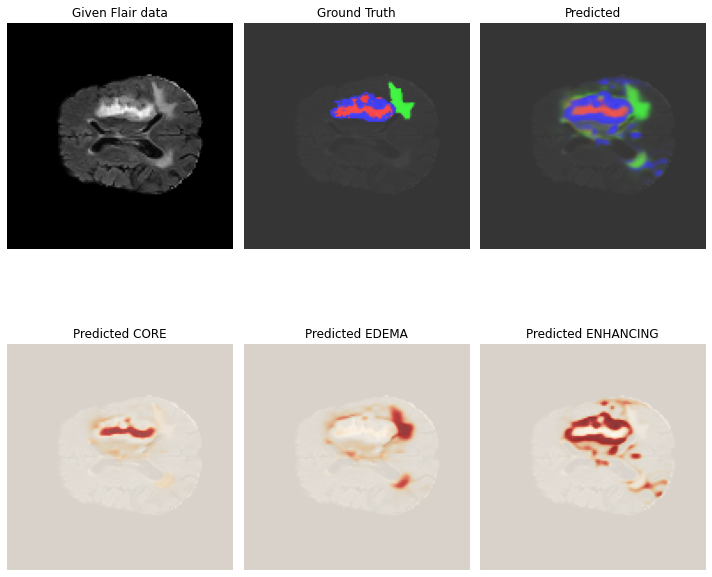

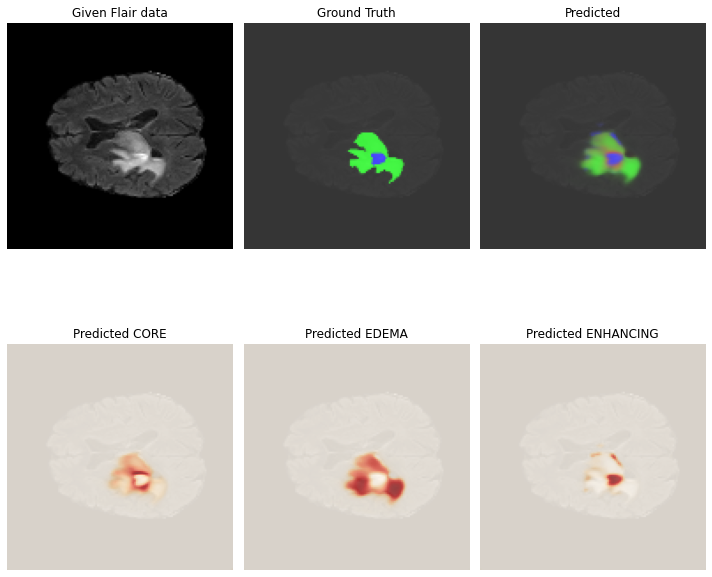

In [8]:
eval("trainset.tfrecord")

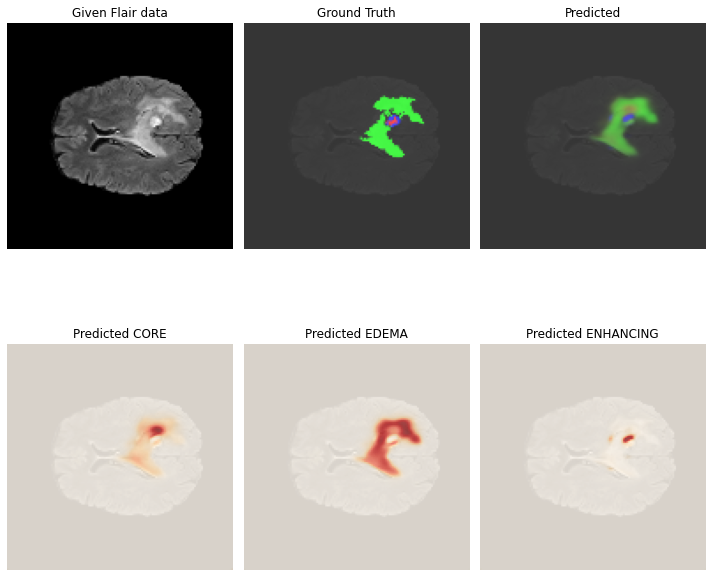

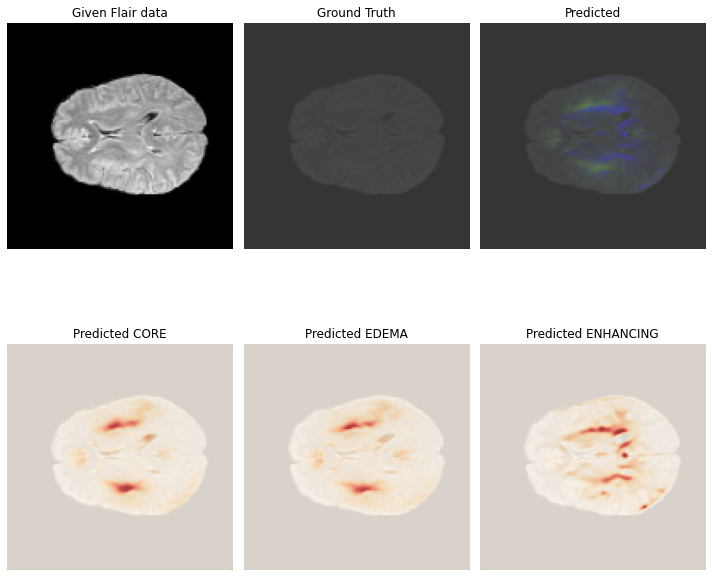

In [11]:
eval("valset.tfrecord")